In [54]:
import pandas as pd
import seaborn as sns
import random
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loguniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
pd.options.display.max_columns = 205
import warnings
warnings.filterwarnings("ignore")
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt

Commençons par importer le Dataframe résultant du travail de cleaning du notebook précédent 

In [55]:
FinalStatcon = sqlite3.connect('finalstat.sqlite')

In [56]:
FinalStat = pd.read_sql("""SELECT * from FinalStat""", FinalStatcon)

In [57]:
DF = FinalStat.copy()

In [58]:
DF

,level_0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,index,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
0,0,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers,8,62,20,0.756,0.0,117.3,109.5,6.84,0,0
1,14,A.C. Green,PF,23,LAL,79,72.0,28.4,4.0,7.4,0.538,0.0,0.1,0.000,4.0,7.4,0.543,0.538,2.8,3.6,0.780,2.7,5.1,7.8,1.1,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers,8,65,17,0.793,0.0,117.8,108.5,8.32,0,0
2,27,A.C. Green,PF,24,LAL,82,64.0,32.1,3.9,7.8,0.503,0.0,0.0,0.000,3.9,7.8,0.505,0.503,3.6,4.6,0.773,3.0,5.7,8.7,1.1,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers,8,62,20,0.756,0.0,112.8,107.0,4.81,0,0
3,42,A.C. Green,PF,25,LAL,82,82.0,30.6,4.9,9.2,0.529,0.0,0.2,0.235,4.8,9.0,0.536,0.532,3.4,4.4,0.786,3.1,5.9,9.0,1.3,1.1,0.7,1.5,2.1,13.3,1989,0.0,0.0,0.0,Los Angeles Lakers,8,57,25,0.695,0.0,114.7,107.5,6.38,0,0
4,54,A.C. Green,PF,26,LAL,82,82.0,33.0,4.7,9.8,0.478,0.2,0.6,0.283,4.5,9.3,0.489,0.486,3.4,4.5,0.751,3.2,5.5,8.7,1.1,0.8,0.6,1.4,2.5,12.9,1990,0.0,0.0,0.0,Los Angeles Lakers,9,63,19,0.768,0.0,110.7,103.9,6.74,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18347,12965,Željko Rebrača,C,29,DET,74,4.0,15.9,2.6,5.1,0.505,0.0,0.0,0.000,2.6,5.1,0.505,0.505,1.8,2.4,0.771,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons,8,50,32,0.610,0.0,94.3,92.2,1.69,0,0
18348,12980,Željko Rebrača,C,30,DET,30,12.0,16.3,2.7,4.8,0.552,0.0,0.0,0.000,2.7,4.8,0.552,0.552,1.3,1.6,0.792,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons,8,50,32,0.610,0.0,91.4,87.7,2.97,0,0
18349,3981,Željko Rebrača,C,31,ATL,24,2.0,11.4,1.4,3.2,0.442,0.0,0.0,0.000,1.4,3.2,0.442,0.442,1.0,1.3,0.767,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks,14,28,54,0.341,33.0,92.8,97.5,-5.00,0,0
18350,14672,Željko Rebrača,C,32,LAC,58,2.0,16.0,2.3,4.0,0.568,0.0,0.0,0.000,2.3,4.0,0.568,0.568,1.3,1.5,0.859,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers,9,37,45,0.451,25.0,95.7,96.5,-0.47,0,0


Intéressons nous aux différentes variables dont nous disposons 

In [59]:
DF.columns

Index(['level_0', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Year', 'Pts Won', 'Pts Max', 'Share', 'Team', 'index', 'W', 'L',
       'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')

On peut commencer par retirer les variables artificielles qui se sont rajoutées après une jointure ou export vers une base sql 

In [60]:
DF.drop(columns = ["index","level_0"], inplace = True)

In [61]:
DF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')

On cherche pour le moment à prédire le prochain MVP. 

Ainsi, il faut choisir une(des) variable(s) cibles qui nous donneront les informations sur le MVP une fois prédites.

Dans la liste des variables disponibles, la variable "Share" semble la plus pertinente à définir comme variable cible.
En effet, cette dernière donne pour chaque joueur la part des points de votes obtenues pour le MVP.

Comme cette variable Share s'obtient par le calcul Pts Won / Pts Max, on ne peut pas se permettre de garder ces variables pour notre modèle car elles nous donnent directement la réponse

In [62]:
DF.drop(columns = ["Pts Won","Pts Max"], inplace = True)

Pour pouvoir entrainer le modèle, il est nécessaire de travailler uniquement sur des variables numériques. Intéressons nous donc aux variables non numériques

In [63]:
DF.select_dtypes(exclude=np.number).columns

Index(['Player', 'Pos', 'Tm', 'Team'], dtype='object')

On voit ici que 4 variables sont concernées :
- "Player" les noms des joueurs
- "Pos" leur position sur le terrain
- "Team" les nom complets de leurs équipes
- "Tm" l'abréviation de leur équipe

On peut déjà supprimer "Tm" qui donnent exactement les mêmes informations que la variable "Team" elle est donc inutile.
Pour les 3 restantes, on va procédérer à un encodage automatique ( on peut se le permettre car il n'y a pas de relation d'ordre pour ces variables)

In [64]:
DF.drop(columns = ["Tm"], inplace = True) 
labelencoder = LabelEncoder()
DF['Player'] = labelencoder.fit_transform(DF['Player'])
DF['Pos'] = labelencoder.fit_transform(DF['Pos'])
DF['Team'] = labelencoder.fit_transform(DF['Team'])

Vérifions que la transformation a fonctionné 

In [65]:
DF.dtypes

Player           int32
Pos              int32
Age              int64
G                int64
GS             float64
MP             float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
2P             float64
2PA            float64
2P%            float64
eFG%           float64
FT             float64
FTA            float64
FT%            float64
ORB            float64
DRB            float64
TRB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
PF             float64
PTS            float64
Year             int64
Share          float64
Team             int32
W                int64
L                int64
W/L%           float64
GB             float64
PS/G           float64
PA/G           float64
SRS            float64
MVP_Y-1          int64
MVP_Y-1_Y-2      int64
dtype: object

## Analyse descriptive

In [66]:
DF.describe()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
count,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.00000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000,18352.000000
mean,1665.178237,1.992044,26.636443,52.406005,25.515366,20.348213,3.175027,6.977114,0.44052,0.495259,1.431637,0.225009,2.679354,5.544971,0.466287,0.473713,1.566145,2.089522,0.701473,1.017911,2.567508,3.584034,1.904719,0.667584,0.418957,1.240388,1.911497,8.409601,2004.514712,0.005807,17.135081,39.647450,40.156877,0.496690,15.506648,102.726934,102.837516,-0.105701,0.002234,0.000599
std,969.853230,1.427347,4.117957,25.507327,29.148744,10.129477,2.280350,4.720315,0.09907,0.670773,1.773394,0.180574,2.091178,4.105765,0.108929,0.102200,1.435892,1.809303,0.193955,0.857847,1.818518,2.546222,1.877571,0.471985,0.501532,0.824982,0.853848,6.133057,11.841537,0.058220,10.404982,12.704771,12.670124,0.153494,12.977338,7.487712,7.515390,4.511463,0.047215,0.024476
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000,0.000000,0.000000
25%,816.000000,1.000000,23.000000,32.000000,1.000000,12.000000,1.400000,3.300000,0.40400,0.000000,0.000000,0.000000,1.100000,2.400000,0.430000,0.441000,0.600000,0.800000,0.651000,0.400000,1.200000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1995.000000,0.000000,8.000000,30.000000,30.000000,0.378000,4.000000,97.000000,97.200000,-3.200000,0.000000,0.000000
50%,1663.500000,2.000000,26.000000,59.000000,10.000000,19.800000,2.600000,5.800000,0.44500,0.200000,0.600000,0.278000,2.100000,4.400000,0.474000,0.483000,1.100000,1.600000,0.748000,0.800000,2.200000,3.000000,1.300000,0.600000,0.300000,1.000000,1.900000,6.900000,2005.000000,0.000000,16.000000,41.000000,39.000000,0.512000,13.000000,102.200000,102.700000,0.110000,0.000000,0.000000
75%,2508.000000,3.000000,29.000000,75.000000,51.000000,28.800000,4.500000,9.800000,0.48800,0.800000,2.400000,0.359000,3.800000,7.800000,0.514000,0.521000,2.100000,2.800000,0.814000,1.400000,3.400000,4.800000,2.600000,0.900000,0.500000,1.700000,2.500000,11.900000,2015.000000,0.000000,27.000000,49.000000,49.000000,0.610000,25.000000,108.400000,108.100000,3.130000,0.000000,0.000000
max,3346.000000,4.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.00000,5.300000,13.200000,1.000000,13.200000,27.000000,1.000000,1.500000,10.300000,13.100000,1.000000,6.900000,12.300000,18.700000,14.500000,3.700000,5.600000,5.700000,6.000000,37.100000,2023.000000,1.000000,36.000000,73.000000,72.000000,0.890000,56.000000,126.500000,130.800000,11.800000,1.000000,1.000000


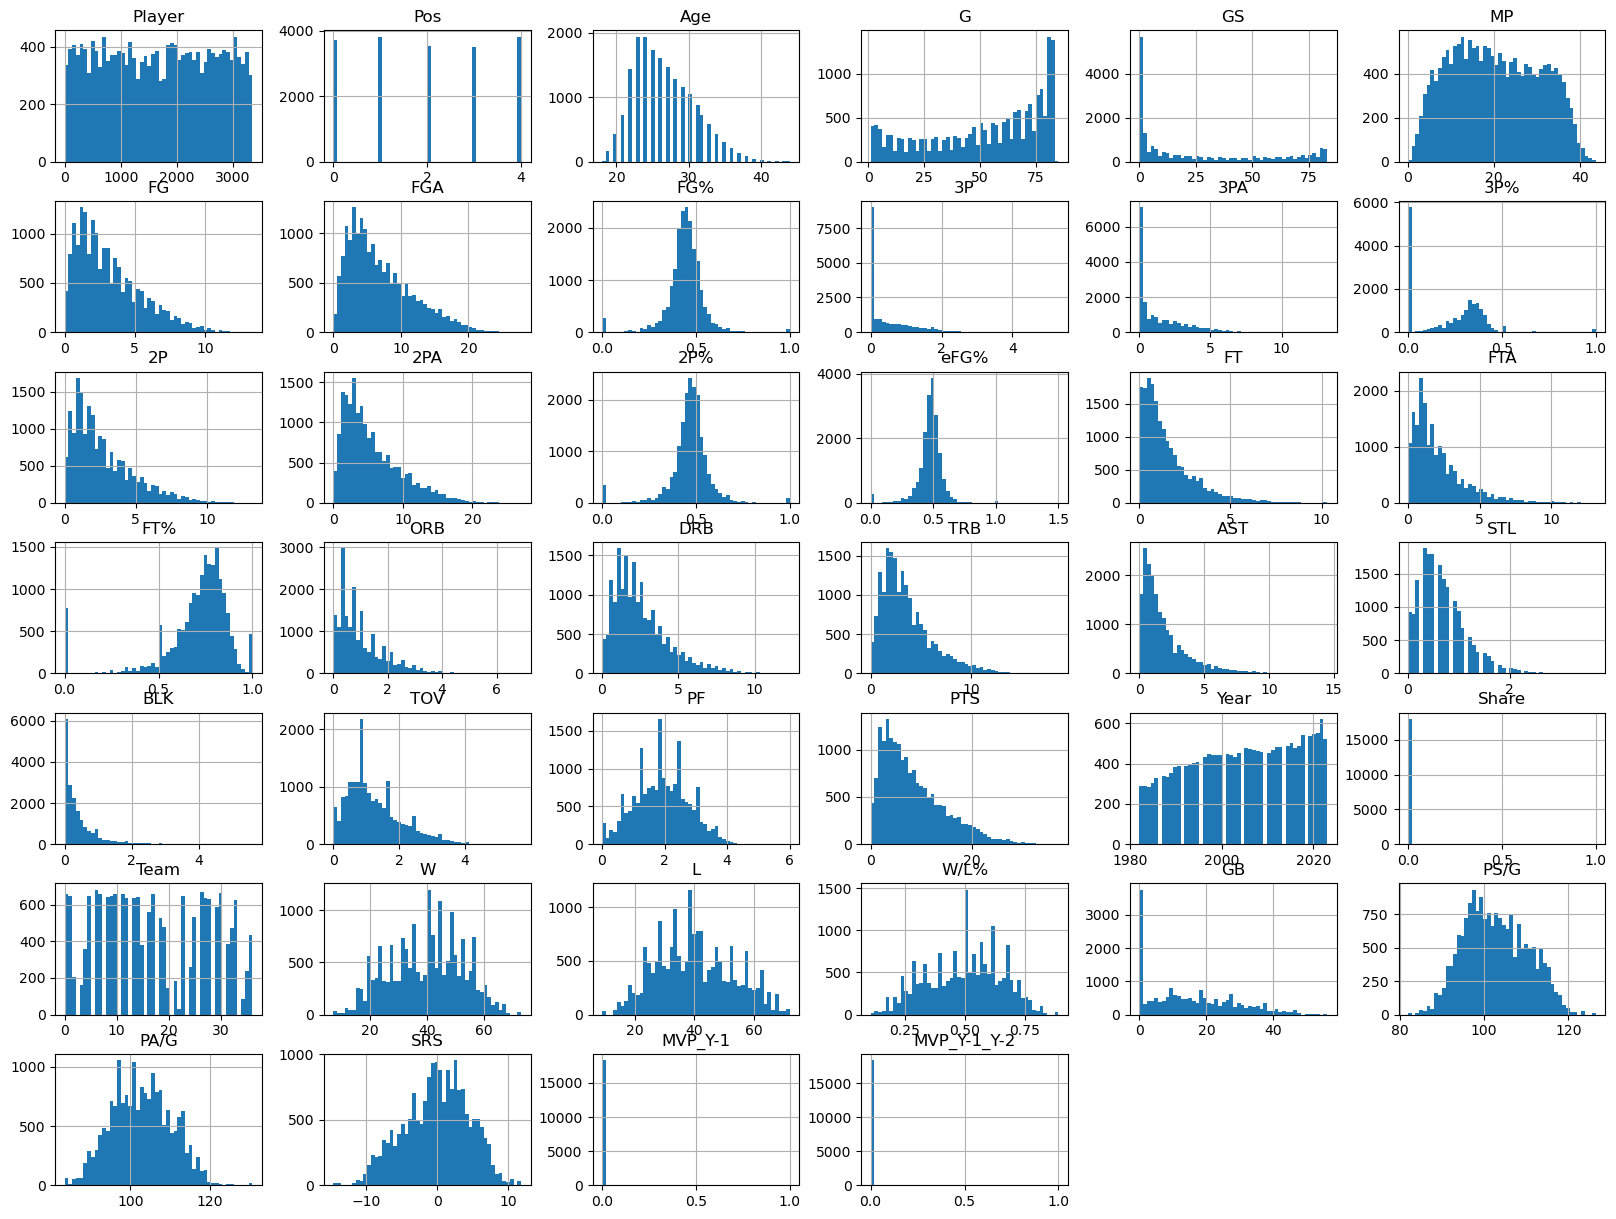

In [67]:
for column in DF.select_dtypes(include=['object']).columns:
    DF[column].value_counts().plot(kind='bar')
    plt.show()

#affiche les histogrammes pour les variables numériques
DF.hist(bins=50, figsize=(20,15))
plt.show()

In [68]:
DF.corr()

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
Player,1.000000,0.021293,-0.013197,0.006804,-0.001043,-0.007024,0.001652,0.005872,-0.016381,0.012829,0.012510,0.023062,-0.002241,0.001475,-0.007798,-0.009434,-0.016718,-0.021044,0.019376,-0.022422,-0.029181,-0.028435,0.013513,-0.000762,-0.026887,-0.004164,-0.021881,-0.001334,-0.002414,0.014678,-0.015293,0.010401,-0.005845,0.009119,-0.008646,0.019297,0.012397,0.012230,0.015981,0.014687
Pos,0.021293,1.000000,-0.066502,-0.001978,-0.010771,0.093562,0.093445,0.163566,-0.227422,0.361782,0.382557,0.388452,-0.013967,0.023146,-0.128755,-0.070732,0.044773,-0.009023,0.169702,-0.419189,-0.304146,-0.358465,0.197882,0.225593,-0.415691,0.050664,-0.226019,0.119486,0.023984,-0.005495,-0.002401,-0.003358,0.002404,-0.003141,0.001458,0.021724,0.024529,-0.004424,-0.003779,0.000137
Age,-0.013197,-0.066502,1.000000,0.055023,0.058168,0.095436,0.025468,0.027403,0.008548,0.057881,0.044042,0.027225,0.009209,0.012486,-0.007798,0.029846,0.016234,-0.002593,0.085876,-0.005897,0.074515,0.051175,0.076481,0.027115,-0.001478,0.010390,0.056175,0.029100,-0.063574,0.018803,-0.005738,0.163655,-0.157930,0.167824,-0.128488,-0.063050,-0.162938,0.160252,0.022956,0.011894
G,0.006804,-0.001978,0.055023,1.000000,0.620061,0.646642,0.546295,0.525837,0.337096,0.220861,0.205131,0.193665,0.524590,0.515734,0.287219,0.335615,0.438731,0.439253,0.388692,0.388115,0.474127,0.469495,0.383432,0.475359,0.294845,0.479542,0.552338,0.533684,-0.170500,0.091099,0.005993,0.127767,-0.036331,0.085165,-0.045990,0.018831,-0.036157,0.087386,0.039065,0.021693
GS,-0.001043,-0.010771,0.058168,0.620061,1.000000,0.828622,0.756362,0.739021,0.257450,0.292773,0.288540,0.137294,0.730819,0.724952,0.213344,0.241787,0.644829,0.648513,0.240234,0.491481,0.658861,0.636262,0.550864,0.616392,0.395698,0.688850,0.597202,0.745777,-0.083594,0.170739,0.002517,0.058643,-0.017504,0.039433,-0.021040,0.001690,-0.023218,0.039770,0.077206,0.041347
MP,-0.007024,0.093562,0.095436,0.646642,0.828622,1.000000,0.892397,0.897682,0.290454,0.448083,0.454780,0.261676,0.829381,0.835679,0.266875,0.316578,0.764023,0.762064,0.387440,0.505842,0.733564,0.694346,0.665802,0.748212,0.388582,0.818607,0.710197,0.891851,-0.040499,0.166188,-0.003848,-0.022121,0.030587,-0.027340,0.031900,-0.024774,-0.007787,-0.027531,0.077277,0.040172
FG,0.001652,0.093445,0.025468,0.546295,0.756362,0.892397,1.000000,0.981764,0.330974,0.416691,0.421047,0.240874,0.956716,0.946960,0.295932,0.329703,0.855654,0.848684,0.352087,0.474264,0.684492,0.648662,0.615562,0.667733,0.361738,0.831614,0.602373,0.989768,-0.059067,0.272542,-0.001927,0.015742,-0.003644,0.009849,-0.003072,0.085240,0.078203,0.010729,0.127759,0.063730
FGA,0.005872,0.163566,0.027403,0.525837,0.739021,0.897682,0.981764,1.000000,0.215746,0.495752,0.511878,0.285215,0.911661,0.928693,0.202860,0.243082,0.842444,0.825157,0.372917,0.395109,0.634786,0.586477,0.648342,0.688898,0.294562,0.836418,0.570227,0.981861,-0.039312,0.246515,-0.005239,-0.016253,0.024830,-0.021417,0.023668,0.045034,0.057869,-0.021120,0.117104,0.056247
FG%,-0.016381,-0.227422,0.008548,0.337096,0.257450,0.290454,0.330974,0.215746,1.000000,-0.054757,-0.098019,0.004348,0.378253,0.290165,0.865666,0.921901,0.245850,0.275824,0.175616,0.395642,0.356502,0.388009,0.087895,0.158838,0.318677,0.220314,0.364149,0.297831,-0.045995,0.066961,0.010607,0.070166,-0.056423,0.065321,-0.055218,0.127737,0.082920,0.071820,0.029261,0.017468
3P,0.012829,0.361782,0.057881,0.220861,0.292773,0.448083,0.416691,0.495752,-0.054757,1.000000,0.984325,0.565538,0.134695,0.145051,0.060578,0.241459,0.272116,0.209809,0.310485,-0.221895,0.142580,0.026882,0.405064,0.354511,-0.122468,0.297110,0.075012,0.482836,0.381288,0.076159,-0.023951,0.012496,-0.057402,0.035180,-0.065547,0.101058,0.077172,0.037286,0.047308,0.029050


In [69]:
DF_corr = DF.corr()
columns = DF.columns
correlated_vars = []
for var1 in columns:
    for var2 in columns:
        if(var1 != var2 and DF_corr[var1][var2]>0.5):
            if([var1,var2] in correlated_vars  or [var2,var1] in correlated_vars):
                pass
            else: 
                correlated_vars.append([var1,var2])


In [70]:
correlated_vars

[['G', 'GS'],
 ['G', 'MP'],
 ['G', 'FG'],
 ['G', 'FGA'],
 ['G', '2P'],
 ['G', '2PA'],
 ['G', 'PF'],
 ['G', 'PTS'],
 ['GS', 'MP'],
 ['GS', 'FG'],
 ['GS', 'FGA'],
 ['GS', '2P'],
 ['GS', '2PA'],
 ['GS', 'FT'],
 ['GS', 'FTA'],
 ['GS', 'DRB'],
 ['GS', 'TRB'],
 ['GS', 'AST'],
 ['GS', 'STL'],
 ['GS', 'TOV'],
 ['GS', 'PF'],
 ['GS', 'PTS'],
 ['MP', 'FG'],
 ['MP', 'FGA'],
 ['MP', '2P'],
 ['MP', '2PA'],
 ['MP', 'FT'],
 ['MP', 'FTA'],
 ['MP', 'ORB'],
 ['MP', 'DRB'],
 ['MP', 'TRB'],
 ['MP', 'AST'],
 ['MP', 'STL'],
 ['MP', 'TOV'],
 ['MP', 'PF'],
 ['MP', 'PTS'],
 ['FG', 'FGA'],
 ['FG', '2P'],
 ['FG', '2PA'],
 ['FG', 'FT'],
 ['FG', 'FTA'],
 ['FG', 'DRB'],
 ['FG', 'TRB'],
 ['FG', 'AST'],
 ['FG', 'STL'],
 ['FG', 'TOV'],
 ['FG', 'PF'],
 ['FG', 'PTS'],
 ['FGA', '3PA'],
 ['FGA', '2P'],
 ['FGA', '2PA'],
 ['FGA', 'FT'],
 ['FGA', 'FTA'],
 ['FGA', 'DRB'],
 ['FGA', 'TRB'],
 ['FGA', 'AST'],
 ['FGA', 'STL'],
 ['FGA', 'TOV'],
 ['FGA', 'PF'],
 ['FGA', 'PTS'],
 ['FG%', '2P%'],
 ['FG%', 'eFG%'],
 ['3P', '3PA'],
 ['3P

In [71]:
corr = DF.corr(method = "pearson")["Share"]
corr

Player         0.014678
Pos           -0.005495
Age            0.018803
G              0.091099
GS             0.170739
MP             0.166188
FG             0.272542
FGA            0.246515
FG%            0.066961
3P             0.076159
3PA            0.076402
3P%            0.027356
2P             0.273069
2PA            0.250346
2P%            0.060115
eFG%           0.058546
FT             0.317197
FTA            0.318128
FT%            0.044979
ORB            0.119109
DRB            0.216043
TRB            0.194186
AST            0.202883
STL            0.182615
BLK            0.147185
TOV            0.233205
PF             0.074718
PTS            0.285283
Year          -0.020930
Share          1.000000
Team          -0.005518
W              0.124116
L             -0.122714
W/L%           0.127289
GB            -0.101131
PS/G           0.040698
PA/G          -0.034824
SRS            0.121143
MVP_Y-1        0.395130
MVP_Y-1_Y-2    0.203142
Name: Share, dtype: float64

In [72]:
abs_corr = abs(corr)
abs_corr.sort_values()

Pos            0.005495
Team           0.005518
Player         0.014678
Age            0.018803
Year           0.020930
3P%            0.027356
PA/G           0.034824
PS/G           0.040698
FT%            0.044979
eFG%           0.058546
2P%            0.060115
FG%            0.066961
PF             0.074718
3P             0.076159
3PA            0.076402
G              0.091099
GB             0.101131
ORB            0.119109
SRS            0.121143
L              0.122714
W              0.124116
W/L%           0.127289
BLK            0.147185
MP             0.166188
GS             0.170739
STL            0.182615
TRB            0.194186
AST            0.202883
MVP_Y-1_Y-2    0.203142
DRB            0.216043
TOV            0.233205
FGA            0.246515
2PA            0.250346
FG             0.272542
2P             0.273069
PTS            0.285283
FT             0.317197
FTA            0.318128
MVP_Y-1        0.395130
Share          1.000000
Name: Share, dtype: float64

Contrairement à ce que l'on pourrait penser, être MVP l'année précédente et dans une moindre mesure les deux années précédentes semble augmenter nos chances d'être MVP

Toutes nos variables sont maintenant numériques. Il faut maintenant réfléchir à quel type de modèle serait le plus pertinent dans notre cas.

La variable "Share" étant une variable prenant des valeurs sur tout l'intervalle [0,1], il sera plus judicieux ici de se tourner vers une régression.

In [73]:
years =  sorted(DF["Year"].unique())
years

[1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023]

Nous allons utiliser les résultats des années allant de 1982 à 2015 pour prédire les MVPS des années 2016 à 2021

Commençons par l'année 2016

On définit l'ensemble d'apprentissage et de test ainsi que la variable cible.

In [22]:
train = DF[DF["Year"]<2016]
test = DF[DF["Year"]==2019]
x_columns =  train.drop('Share', axis=1).columns
y_column  = 'Share'


Entrainement et utilisation du modèle

In [23]:
reg = LinearRegression().fit(train[x_columns], train[y_column])
Y_pred_MVP_2016 = reg.predict(test[x_columns])

Un peu de mise en forme...

In [24]:
Y_pred_MVP_2016 = pd.DataFrame(Y_pred_MVP_2016,columns = ["Pred_Share"],index = test.index)  #on associe à notre dataframe les index de l'ensemble de test pour pouvoir faire correspondre chaque prédiction au joueur correspondant.
Y_pred_MVP_2016

,Pred_Share
44,0.018573
57,0.004188
94,-0.007393
197,0.044367
231,-0.001252
...,...
17136,0.004972
17144,-0.015927
17147,-0.009072
17170,-0.029882


Relions ces prédictions aux noms des joueurs concernés à l'aide de l'index des lignes

In [25]:
DF_pred = pd.concat([FinalStat["Player"],Y_pred_MVP_2016],axis = 1,join="inner")
DF_pred      

,Player,Pred_Share
44,Aaron Gordon,0.018573
57,Aaron Holiday,0.004188
94,Abdel Nader,-0.007393
197,Al Horford,0.044367
231,Al-Farouq Aminu,-0.001252
...,...,...
17136,Zaza Pachulia,0.004972
17144,Zhaire Smith,-0.015927
17147,Zhou Qi,-0.009072
17170,Álex Abrines,-0.029882


Trions ce dataframe pour avoir le classement prédit

In [26]:
DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)

Maintenant que les lignes sont triées, on peut créer une colonne "Rank_pred" qui correspond à la position du joueur pour le MVP

In [27]:
DF_pred["Rank_pred"] = 0
DF_pred["Rank_pred"] = DF_pred["Pred_Share"].rank(ascending=False, method='min').astype(int)

In [28]:
DF_pred

,Player,Pred_Share,Rank_pred
7218,James Harden,0.556589,1
6094,Giannis Antetokounmpo,0.200168,2
8309,Joel Embiid,0.157092,3
10253,LeBron James,0.157069,4
833,Anthony Davis,0.153043,5
...,...,...,...
14990,Solomon Hill,-0.036808,532
5760,Frank Ntilikina,-0.037520,533
1156,Avery Bradley,-0.043537,534
12654,P.J. Tucker,-0.044317,535


Pour comparer ces résultats aux vrais résultats, on va créer un Dataframe équivalent mais pour les valeurs réelles 

In [29]:
DF_reel = pd.DataFrame(test[y_column])
DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)

In [30]:
DF_reel["Rank_reel"] = 0
DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
DF_reel


,Share,Rank_reel
6094,0.932,1
7218,0.768,2
12806,0.352,3
12414,0.210,4
15108,0.173,5
...,...,...
5920,0.000,13
5906,0.000,13
5874,0.000,13
5851,0.000,13


On drop la colonne Share pour éviter le doublon après la jointure avec le DF_pred

In [31]:
DF_reel.drop(columns = ["Share"], inplace = True)

In [32]:
DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
DF_pred

,Player,Pred_Share,Rank_pred,Share
7218,James Harden,0.556589,1,0.768
6094,Giannis Antetokounmpo,0.200168,2,0.932
8309,Joel Embiid,0.157092,3,0.049
10253,LeBron James,0.157069,4,0.001
833,Anthony Davis,0.153043,5,0.000
...,...,...,...,...
14990,Solomon Hill,-0.036808,532,0.000
5760,Frank Ntilikina,-0.037520,533,0.000
1156,Avery Bradley,-0.043537,534,0.000
12654,P.J. Tucker,-0.044317,535,0.000


Rassemblons tout cela dans un seul dataframe DF_2016

In [34]:
DF_2016 = pd.concat([DF_pred,DF_reel], axis  = 1 )
DF_2016.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
DF_2016.head(13)

,Player,Pred_Share,Rank_pred,Share,Rank_reel
6094,Giannis Antetokounmpo,0.200168,2,0.932,1
7218,James Harden,0.556589,1,0.768,2
12806,Paul George,0.113945,9,0.352,3
12414,Nikola Jokić,0.113747,10,0.210,4
15108,Stephen Curry,0.102526,12,0.173,5
3453,Damian Lillard,0.093318,15,0.068,6
8309,Joel Embiid,0.157092,3,0.049,7
9482,Kevin Durant,0.125667,7,0.025,8
9113,Kawhi Leonard,0.123076,8,0.013,9
14246,Russell Westbrook,0.128037,6,0.008,10


On constate que l'on prédit correctement le MVP de 2016, maintenant il faudrait trouver une métrique pertinente pour évaluer l'écart entre la position réelle du top 3 (ou 5) avec leur position prédite

In [95]:
def error_rank_mvp(df):
    #DF : Dataframe contenant au minimum la variable "Share"  ainsi que 
    #le classement réel et le classement prédit "Rank_pred", "Rank_reel"
    #On trie le Dataframe sur le classement réel
    df.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
    #La variable i va contenir la position du dernier convoqué au MVP.
    #De cette manière en parcourant le Dataframe du début jusqu'à la position i, 
    #nous aurons tous les convoqués au MVP
    i= 0
    while df["Share"].iloc[i] > 0:
        i +=1
    print("Nombre de convoqués MVP : {}".format(i))
    rmse = (np.abs(df["Rank_reel"][:i]-df["Rank_pred"][:i]))**2
    rmse = rmse.sum()/i
    rmse = np.sqrt(rmse)
    
    return(rmse)

    
    

In [36]:
error_rank_mvp(DF_2016)

Nombre de convoqués MVP : 12


4.96655480858378

Généralisons maintenant cette fonction de sorte à calculer cette erreur pour chaque année puis faire la moyenne

In [93]:
def pred_to_df(Y_pred,test,y_column):
        #Mise sous dataframe des prédictions
        Y_pred = pd.DataFrame(Y_pred,columns = ["Pred_Share"],index = test.index)
        #Création du dataframe des valeurs prédites avec leurs rangs
        DF_pred = pd.concat([test["Player"],Y_pred],axis = 1,join="inner")
        DF_pred.sort_values(by=['Pred_Share'],ascending = False, inplace = True)
        DF_pred["Rank_pred"] = 0
        DF_pred["Rank_pred"] = DF_pred["Pred_Share"].rank(ascending=False, method='min').astype(int)
        ##Création du dataframe des valeurs réelles avec leurs rangs
        DF_reel = pd.DataFrame(test[y_column])
        DF_reel.sort_values(by=['Share'],ascending = False, inplace = True)
        DF_reel["Rank_reel"] = 0
        DF_reel["Rank_reel"] = DF_reel["Share"].rank(ascending=False, method='min').astype(int)
        DF_reel.drop(columns = ["Share"], inplace = True)
        #Concaténation
        DF_pred = pd.concat([DF_pred,test[y_column]],axis = 1,join="inner")
        DF_year = pd.concat([DF_pred,DF_reel], axis  = 1 )
        DF_year.sort_values(by=['Rank_reel'],ascending = True, inplace = True)
        return DF_year
    
    

In [91]:
def cross_validation(DF,model,n_splits = 8,selected_features = DF.drop('Share', axis=1).columns,cv = True,year = None ):
    #DF : Dataframe comportant toutes les données exploitables pour l'apprentissage
    #model : Type du modèle que l'on va entrainer pour la prédiction du MVP
    if cv == True:
        years =  sorted(DF["Year"].unique())
        x_columns =  selected_features
        y_column  = 'Share'
        global_error = 0
        valid_years = np.random.choice(years, size=n_splits, replace=False)
        for year in valid_years:
            #Construction ensemble apprentissage/test
            train =  DF[DF["Year"] != year]
            test =   DF[DF["Year"] == year]

            #Entrainement du meilleur modèle

            model.fit(train[x_columns], train[y_column])
            #Prédiction
            Y_pred_MVP = model.predict(test[x_columns])
            #Création du Dataframe comportant le classement réel et le classement prédit
            DF_year = pred_to_df(Y_pred_MVP,test,y_column)
            print(DF_year)
            #Calcul de l'erreur de prédiction
            year_error = error_rank_mvp(DF_year)
            print("Année TEST : {}".format(round(year*(2023-1982)+1982))+" ERROR RANK: {}\n".format(year_error))
            global_error = global_error + year_error

        print("ERREUR GLOBALE MOYENNE : {}".format(global_error/n_splits))
        return(global_error/n_splits)
        
    else:
        
        x_columns =  selected_features
        y_column  = 'Share'
        train =  DF[DF["Year"] != year]
        test =   DF[DF["Year"] == year]
        model.fit(train[x_columns], train[y_column])
        Y_pred_MVP = model.predict(test[x_columns])
        DF_year = pred_to_df(Y_pred_MVP,test,y_column)
        year_error = error_rank_mvp(DF_year)
        print(DF_year)
        print("Année TEST : {}".format(year)+" ERROR RANK: {}\n".format(year_error))
        return year_error,DF_year
    return 0
   
    
    

In [51]:
reg = LinearRegression()
cross_validation(DF,reg)

       Player  Pred_Share  Rank_pred  Share  Rank_reel
10244    1869    0.564515          1  0.980          1
9473     1740    0.105150          3  0.495          2
9762     1788    0.073776          7  0.487          3
5030      907    0.104519          4  0.389          4
5057      910    0.111422          2  0.097          5
...       ...         ...        ...    ...        ...
14279    2609    0.005764        156  0.000         17
13394    2452    0.005921        155  0.000         17
2579      459    0.006066        154  0.000         17
16351    2981    0.005158        165  0.000         17
982       172   -0.053764        454  0.000         17

[454 rows x 5 columns]
Nombre de convoqués MVP : 16
Année TEST : 2010 ERROR RANK: 38.005756142984445

       Player  Pred_Share  Rank_pred  Share  Rank_reel
14783    2700    0.156233          2  0.998          1
9509     1743    0.078243          6  0.337          2
423        82    0.093553          3  0.303          3
9094     1664    

24.540582802863305

In [52]:
rf = RandomForestRegressor()
cross_validation(DF,rf)

       Player  Pred_Share  Rank_pred  Share  Rank_reel
11624    2117     0.83952          1  0.986          1
4007      712     0.42130          2  0.508          2
745       135     0.04795         11  0.319          3
6418     1152     0.11997          5  0.211          4
14565    2660     0.02019         16  0.200          5
...       ...         ...        ...    ...        ...
15546    2837     0.00000         68  0.000         18
16051    2924     0.00000         68  0.000         18
15559    2840     0.00000         68  0.000         18
15091    2752     0.00000         68  0.000         18
17193    3142     0.00000         68  0.000         18

[431 rows x 5 columns]
Nombre de convoqués MVP : 17
Année TEST : 1996 ERROR RANK: 8.934401457946956

       Player  Pred_Share  Rank_pred  Share  Rank_reel
10246    1869     0.36675          2  0.888          1
9475     1740     0.46136          1  0.735          2
2857      504     0.01183         14  0.318          3
9764     1788     

11.440149357917335

In [53]:
en = ElasticNet(alpha= 0.1, fit_intercept= True, l1_ratio= 0, max_iter= 500)
cross_validation(DF,en)

       Player  Pred_Share  Rank_pred  Share  Rank_reel
9093     1664    0.109638          2  0.701          1
422        82    0.078224          5  0.655          2
15712    2865    0.076667          6  0.627          3
383        78    0.066835          9  0.270          4
7507     1360    0.060253         12  0.135          5
...       ...         ...        ...    ...        ...
12812    2343    0.008923        157  0.000         22
1504      262    0.009091        156  0.000         22
11154    2029    0.009092        155  0.000         22
9323     1712    0.009192        153  0.000         22
15562    2840   -0.061229        444  0.000         22

[444 rows x 5 columns]
Nombre de convoqués MVP : 21
Année TEST : 1999 ERROR RANK: 34.237962778735756

       Player  Pred_Share  Rank_pred  Share  Rank_reel
4006      712    0.144165          1  0.858          1
14778    2700    0.137398          2  0.576          2
9089     1664    0.125484          4  0.507          3
12734    2333    

24.084237940737662

In [54]:
rf2 = RandomForestRegressor(bootstrap = True, max_features = 'auto', n_estimators = 500)
cross_validation(DF,rf2)

       Player  Pred_Share  Rank_pred  Share  Rank_reel
12416    2267    0.226234          7  0.961          1
8311     1505    0.331314          3  0.580          2
15110    2756    0.336100          2  0.449          3
6096     1098    0.388332          1  0.345          4
2866      504    0.021314         27  0.138          5
...       ...         ...        ...    ...        ...
11487    2097    0.000000        126  0.000         17
11489    2098    0.000000        126  0.000         17
11546    2106    0.000000        126  0.000         17
16005    2916    0.000000        126  0.000         17
8769     1589    0.000000        126  0.000         17

[554 rows x 5 columns]
Nombre de convoqués MVP : 16
Année TEST : 2021 ERROR RANK: 29.390687300571926

       Player  Pred_Share  Rank_pred  Share  Rank_reel
11621    2117    0.914578          1  0.938          1
3121      548    0.173136          3  0.584          2
4003      712    0.106526          8  0.351          3
9086     1664    

15.451226779001317

In [63]:
def best_param(model,para_grids,year):
    train = DF[DF["Year"] != year]
    test = DF[DF["Year"] ==year ]
    x_columns =  train.drop('Share', axis=1).columns
    y_column  = 'Share'
    reg = model.fit(train[x_columns], train[y_column])
    grid = GridSearchCV(reg, para_grids)
    grid.fit(train[x_columns],train[y_column])
    reg_grid = grid.best_estimator_
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')
    print(grid.best_score_, grid.best_params_)
    bestpm = grid.best_params_
    
    return bestpm
    

In [ ]:
para_grids_elasticNET = {
    'l1_ratio' : [0,0.1],
    'alpha' : [0,0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'fit_intercept' : [True, False],
    'max_iter' : [100, 500, 1000, 1500]
}

In [59]:
para_grids_randomForest = {
    "random_state" : [42],
    "n_estimators" : [10,50,100,200,500],
    "max_features" : ["auto","log2","sqrt"],
    "bootstrap" : [True, False]
    }

In [78]:
scaler = MinMaxScaler()
# Adapter et transformer les données à l'aide de l'objet scaler
DF_scaled = pd.DataFrame(scaler.fit_transform(DF), columns=DF.columns)

In [79]:
DF_scaled["Year"].unique()

array([0.09756098, 0.12195122, 0.14634146, 0.17073171, 0.19512195,
       0.2195122 , 0.24390244, 0.26829268, 0.29268293, 0.31707317,
       0.34146341, 0.36585366, 0.3902439 , 0.41463415, 0.43902439,
       0.46341463, 1.        , 0.48780488, 0.51219512, 0.85365854,
       0.68292683, 0.70731707, 0.73170732, 0.75609756, 0.7804878 ,
       0.80487805, 0.63414634, 0.65853659, 0.82926829, 0.87804878,
       0.90243902, 0.92682927, 0.95121951, 0.97560976, 0.53658537,
       0.56097561, 0.58536585, 0.6097561 , 0.        , 0.02439024,
       0.04878049, 0.07317073])

In [19]:
DF_scaled

,Player,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2
0,0.0,0.25,0.153846,0.964286,0.012048,0.430206,0.186567,0.169065,0.539,0.000000,0.007576,0.167,0.189394,0.174074,0.545,0.360000,0.116505,0.152672,0.611,0.289855,0.219512,0.245989,0.048276,0.162162,0.107143,0.210526,0.466667,0.172507,0.102564,0.0,0.388889,0.833333,0.174603,0.829082,0.000000,0.793722,0.550633,0.812689,0.0,0.0
1,0.0,0.25,0.192308,0.928571,0.867470,0.649886,0.298507,0.266187,0.538,0.000000,0.007576,0.000,0.303030,0.274074,0.543,0.358667,0.271845,0.274809,0.780,0.391304,0.414634,0.417112,0.075862,0.243243,0.178571,0.228070,0.366667,0.291105,0.128205,0.0,0.388889,0.878788,0.126984,0.876276,0.000000,0.804933,0.529536,0.868580,0.0,0.0
2,0.0,0.25,0.230769,0.964286,0.771084,0.734554,0.291045,0.280576,0.503,0.000000,0.000000,0.000,0.295455,0.288889,0.505,0.335333,0.349515,0.351145,0.773,0.434783,0.463415,0.465241,0.075862,0.297297,0.089286,0.263158,0.416667,0.307278,0.153846,0.0,0.388889,0.833333,0.174603,0.829082,0.000000,0.692825,0.497890,0.736027,0.0,0.0
3,0.0,0.25,0.269231,0.964286,0.987952,0.700229,0.365672,0.330935,0.529,0.000000,0.015152,0.235,0.363636,0.333333,0.536,0.354667,0.330097,0.335878,0.786,0.449275,0.479675,0.481283,0.089655,0.297297,0.125000,0.263158,0.350000,0.358491,0.179487,0.0,0.388889,0.757576,0.253968,0.751276,0.000000,0.735426,0.508439,0.795317,0.0,0.0
4,0.0,0.25,0.307692,0.964286,0.987952,0.755149,0.350746,0.352518,0.478,0.037736,0.045455,0.283,0.340909,0.344444,0.489,0.324000,0.330097,0.343511,0.751,0.463768,0.447154,0.465241,0.075862,0.216216,0.107143,0.245614,0.416667,0.347709,0.205128,0.0,0.388889,0.848485,0.158730,0.844388,0.000000,0.645740,0.432489,0.808912,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17202,1.0,0.00,0.423077,0.869048,0.048193,0.363844,0.194030,0.183453,0.505,0.000000,0.000000,0.000,0.196970,0.188889,0.505,0.336667,0.174757,0.183206,0.771,0.159420,0.227642,0.208556,0.034483,0.108108,0.178571,0.192982,0.433333,0.185984,0.512821,0.0,0.250000,0.651515,0.365079,0.642857,0.000000,0.278027,0.185654,0.618202,0.0,0.0
17203,1.0,0.00,0.461538,0.345238,0.144578,0.372998,0.201493,0.172662,0.552,0.000000,0.000000,0.000,0.204545,0.177778,0.552,0.368000,0.126214,0.122137,0.792,0.130435,0.178862,0.165775,0.020690,0.054054,0.107143,0.175439,0.433333,0.177898,0.538462,0.0,0.250000,0.651515,0.365079,0.642857,0.000000,0.213004,0.090717,0.666541,0.0,0.0
17204,1.0,0.00,0.500000,0.273810,0.024096,0.260870,0.104478,0.115108,0.442,0.000000,0.000000,0.000,0.106061,0.118519,0.442,0.294667,0.097087,0.099237,0.767,0.144928,0.121951,0.128342,0.020690,0.054054,0.089286,0.122807,0.366667,0.102426,0.564103,0.0,0.000000,0.318182,0.714286,0.299745,0.589286,0.244395,0.297468,0.365559,0.0,0.0
17205,1.0,0.00,0.538462,0.678571,0.024096,0.366133,0.171642,0.143885,0.568,0.000000,0.000000,0.000,0.174242,0.148148,0.568,0.378667,0.126214,0.114504,0.859,0.115942,0.186992,0.171123,0.027586,0.054054,0.125000,0.140351,0.366667,0.156334,0.589744,0.0,0.361111,0.454545,0.571429,0.440051,0.446429,0.309417,0.276371,0.536631,0.0,0.0


In [33]:
rf3 = RandomForestRegressor()
cross_validation(DF_scaled,rf3)

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
12155  0.703339     0.35396          2  0.735          1
10081  0.585374     0.30697          4  0.588          2
8933   0.517965     0.32165          3  0.294          3
13791  0.802862     0.05365         12  0.190          4
6392   0.364388     0.08829          7  0.167          5
...         ...         ...        ...    ...        ...
11736  0.679491     0.00000         73  0.000         26
11752  0.680445     0.00000         73  0.000         26
11786  0.682353     0.00000         73  0.000         26
10664  0.618124     0.00000         73  0.000         26
1361   0.075994     0.00000         73  0.000         26

[288 rows x 5 columns]
Nombre de convoqués MVP : 25
Année TEST : 0.0 ERROR RANK: 15.931101656822104

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
10649  0.617488     0.49520          3  0.940          1
11616  0.673132     0.33069          5  0.576          2
10086  0.585374     0.77768    

12.853438045210655

In [35]:
rf3 = RandomForestRegressor()
cross_validation(DF_scaled,rf3)

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
9513   0.554213     0.49593          1  0.991          1
15717  0.910970     0.36556          2  0.582          2
7913   0.455008     0.14415          4  0.425          3
12897  0.750079     0.13373          5  0.228          4
9756   0.568521     0.09586          6  0.172          5
...         ...         ...        ...    ...        ...
15651  0.906200     0.00000         80  0.000         17
15660  0.906518     0.00000         80  0.000         17
15706  0.910334     0.00000         80  0.000         17
15124  0.877266     0.00000         80  0.000         17
17204  1.000000     0.00000         80  0.000         17

[454 rows x 5 columns]
Nombre de convoqués MVP : 16
Année TEST : 2004 ERROR RANK: 17.067879188698285

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
15258  0.884261     0.11391         10  0.839          1
14788  0.858506     0.24636          3  0.813          2
4682   0.267091     0.22538   

13.126555301988581

In [43]:
x_columns =  DF.drop('Share', axis=1).columns
fi_rf3 = rf3.feature_importances_
FI = pd.DataFrame({'Variable' : x_columns,'Fi':fi_rf3})

In [66]:
FI.sort_values(['Fi'],ascending = False,inplace = True)
FI

,Variable,Fi
27,PTS,0.274973
32,W/L%,0.135842
31,L,0.064756
36,SRS,0.054844
6,FG,0.051619
22,AST,0.043550
30,W,0.042538
37,MVP_Y-1,0.036982
20,DRB,0.024270
35,PA/G,0.020807


In [69]:
selected_features2 = FI["Variable"].iloc[:20]

In [51]:
abs_corr.sort_values(ascending= False)

Share          1.000000
MVP_Y-1        0.410836
FTA            0.321239
FT             0.321164
PTS            0.291952
FG             0.278106
2P             0.275405
FGA            0.252398
2PA            0.252303
TOV            0.236183
DRB            0.218125
AST            0.205922
MVP_Y-1_Y-2    0.205875
TRB            0.195338
STL            0.186821
GS             0.173441
MP             0.169505
BLK            0.148720
W/L%           0.129459
W              0.126705
L              0.125004
SRS            0.124348
ORB            0.119657
GB             0.104376
G              0.092371
3PA            0.085496
3P             0.084879
PF             0.073089
FG%            0.069328
2P%            0.065906
eFG%           0.062749
PS/G           0.048479
FT%            0.046570
PA/G           0.032077
3P%            0.029177
Age            0.018004
Year           0.016435
Player         0.015005
Team           0.005733
Pos            0.002626
Name: Share, dtype: float64

Le nombre de point par match marqué par le joueur semble être une des variables les plus déterminantes dans l'attribution du MVP

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression
X = DF.drop('Share', axis=1)
y = DF['Share']

# Sélection des 5 variables les plus importantes avec la méthode f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X, y)
# Obtention des noms des variables sélectionnées
mask = selector.get_support() # masque des variables sélectionnées
selected_features = X.columns[mask] # noms des variables sélectionnées

# Affichage des noms des variables sélectionnées
print("Variables sélectionnées : ", selected_features)

Variables sélectionnées :  Index(['GS', 'MP', 'FG', 'FGA', '2P', '2PA', 'FT', 'FTA', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PTS', 'W', 'L', 'W/L%', 'MVP_Y-1', 'MVP_Y-1_Y-2'],
      dtype='object')


In [61]:
rf3 = RandomForestRegressor()
cross_validation(DF_scaled,rf3,selected_features = selected_features)

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
10084  0.585374     0.87372          1  0.978          1
10647  0.617488     0.42119          2  0.338          2
12158  0.703339     0.37278          3  0.279          3
9067   0.528140     0.08829          9  0.264          4
15518  0.901431     0.13686          6  0.177          5
...         ...         ...        ...    ...        ...
11919  0.689030     0.00000         74  0.000         24
11908  0.688076     0.00000         74  0.000         24
1542   0.085851     0.00000         74  0.000         24
1429   0.080127     0.00000         74  0.000         24
9235   0.539905     0.00000         74  0.000         24

[305 rows x 5 columns]
Nombre de convoqués MVP : 23
Année TEST : 1985 ERROR RANK: 13.8155551903422

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
9760   0.568521     0.41297          1  0.873          1
2853   0.160254     0.17100          6  0.710          2
9517   0.554213     0.04348     

14.34793658696194

In [70]:
rf4 = RandomForestRegressor()
cross_validation(DF_scaled,rf4,selected_features = selected_features2)

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
10243  0.594277     0.92641          1  0.969          1
9761   0.568521     0.64452          2  0.577          2
5056   0.289348     0.08894          4  0.562          3
5029   0.288394     0.28137          3  0.271          4
2854   0.160254     0.07905          5  0.159          5
...         ...         ...        ...    ...        ...
10600  0.614308     0.00000         72  0.000         13
10611  0.614944     0.00000         72  0.000         13
10625  0.615262     0.00000         72  0.000         13
14278  0.829571     0.00000         72  0.000         13
8845   0.512560     0.00000         72  0.000         13

[457 rows x 5 columns]
Nombre de convoqués MVP : 12
Année TEST : 2009 ERROR RANK: 9.237604307034012

Share
         Player  Pred_Share  Rank_pred  Share  Rank_reel
10083  0.585374     0.45581          1  0.858          1
1320   0.073768     0.07753          6  0.491          2
10646  0.617488     0.12173    

8.006609668062913

Les résultats sont dratistiquement améliorés en sélectionnant uniquement les variables les plus importantes que l'on a pu observer dans les précédents modèles de random forest comparé à une simple corrélation

In [74]:
fi_rf4 = rf4.feature_importances_
FI2 = pd.DataFrame({'Variable' : selected_features2,'Fi':fi_rf4})

In [77]:
FI2.sort_values("Fi",ascending = False)

,Variable,Fi
27,PTS,0.309181
32,W/L%,0.164185
30,W,0.060847
22,AST,0.054546
31,L,0.047393
36,SRS,0.046158
37,MVP_Y-1,0.040761
6,FG,0.039816
35,PA/G,0.031661
20,DRB,0.030700


In [76]:
selected_features2 = ["PTS", "W/L%", "W", "AST","L","SRS","MVP_Y-1","FG","PA/G","DRB","FG%","TRB","FTA","BLK","STL","FT%","TOV","PF","Player","GB"]

In [112]:
rf_2023 = RandomForestRegressor()
DF_year = cross_validation(DF,rf_2023,selected_features = selected_features2,cv = False,year = 2023)[1]

Nombre de convoqués MVP : 13
       Player  Pred_Share  Rank_pred  Share  Rank_reel
13267    2417     0.43565          5  0.875          1
8859     1607     0.49128          2  0.706          2
6472     1156     0.66200          1  0.595          3
4831      853     0.02762         24  0.216          4
11283    2053     0.45121          3  0.146          5
...       ...         ...        ...    ...        ...
7248     1298     0.00000        101  0.000         14
7220     1292     0.00000        101  0.000         14
7218     1291     0.00000        101  0.000         14
12972    2356     0.00000        101  0.000         14
9354     1703     0.00000        101  0.000         14

[524 rows x 5 columns]
Année TEST : 2023 ERROR RANK: 10.336641323280684



In [113]:
DF_Merge = pd.merge(FinalStat, DF_year, left_index=True, right_index=True, how='inner')
DF_Merge

,level_0,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share_x,Team,index,W,L,W/L%,GB,PS/G,PA/G,SRS,MVP_Y-1,MVP_Y-1_Y-2,Player_y,Pred_Share,Rank_pred,Share_y,Rank_reel
19,281,A.J. Green,SG,23,MIL,31,0.0,9.5,1.5,3.5,0.444,1.3,2.9,0.433,0.3,0.6,0.500,0.625,0.1,0.1,1.000,0.2,1.0,1.2,0.6,0.2,0.0,0.3,0.9,4.5,2023,0.0,0.0,0.0,Milwaukee Bucks,6,50,19,0.725,0.0,116.1,112.0,4.13,0,0,3,0.00000,101,0.0,14
24,362,A.J. Lawson,SG,22,DAL,13,0.0,4.8,1.0,2.0,0.500,0.5,1.2,0.438,0.5,0.8,0.600,0.635,0.1,0.2,0.333,0.2,0.6,0.8,0.1,0.1,0.0,0.1,0.6,2.6,2023,0.0,0.0,0.0,Dallas Mavericks,14,35,35,0.500,7.0,113.9,113.3,0.48,0,0,6,0.00000,101,0.0,14
32,490,AJ Griffin,SF,19,ATL,61,11.0,19.4,3.4,7.3,0.469,1.4,3.6,0.384,2.0,3.7,0.551,0.563,0.5,0.6,0.889,0.4,1.6,2.0,1.0,0.6,0.1,0.6,1.2,8.8,2023,0.0,0.0,0.0,Atlanta Hawks,13,34,35,0.493,3.0,117.2,117.5,-0.23,0,0,9,0.00000,101,0.0,14
51,804,Aaron Gordon,PF,27,DEN,57,57.0,30.1,6.4,11.1,0.581,0.9,2.6,0.370,5.5,8.5,0.644,0.623,3.0,4.8,0.622,2.4,4.3,6.7,2.9,0.8,0.8,1.5,1.9,16.8,2023,0.0,0.0,0.0,Denver Nuggets,1,46,23,0.667,0.0,116.8,113.2,3.26,0,0,11,0.00033,57,0.0,14
67,491,Aaron Holiday,PG,26,ATL,54,5.0,13.6,1.5,3.5,0.418,0.6,1.4,0.413,0.9,2.1,0.421,0.500,0.4,0.5,0.857,0.4,0.8,1.2,1.2,0.5,0.2,0.6,1.3,3.9,2023,0.0,0.0,0.0,Atlanta Hawks,13,34,35,0.493,3.0,117.2,117.5,-0.23,0,0,15,0.00000,101,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18229,5370,Zach Collins,C,25,SAS,56,19.0,22.1,4.2,8.1,0.521,0.8,2.0,0.386,3.4,6.0,0.567,0.570,1.6,2.2,0.760,1.8,4.4,6.2,2.8,0.5,0.7,1.9,3.1,10.8,2023,0.0,0.0,0.0,San Antonio Spurs,16,18,51,0.261,23.5,112.5,122.1,-9.55,0,0,3320,0.00000,101,0.0,14
18238,4703,Zach LaVine,SG,27,CHI,64,64.0,36.0,8.7,18.1,0.478,2.8,7.3,0.382,5.9,10.8,0.543,0.555,4.8,5.7,0.849,0.5,4.2,4.8,4.0,0.9,0.2,2.6,2.2,24.9,2023,0.0,0.0,0.0,Chicago Bulls,8,31,37,0.456,18.5,113.2,112.5,0.77,0,0,3321,0.00280,36,0.0,14
18278,819,Zeke Nnaji,PF,22,DEN,44,5.0,13.3,2.0,3.5,0.572,0.3,1.0,0.289,1.7,2.4,0.692,0.615,0.8,1.2,0.667,1.3,1.0,2.3,0.3,0.3,0.4,0.5,1.8,5.1,2023,0.0,0.0,0.0,Denver Nuggets,1,46,23,0.667,0.0,116.8,113.2,3.26,0,0,3327,0.00000,101,0.0,14
18290,15263,Ziaire Williams,SF,21,MEM,36,3.0,14.7,2.1,4.9,0.424,0.6,2.5,0.247,1.5,2.4,0.602,0.486,0.4,0.5,0.778,0.4,1.7,2.1,0.7,0.4,0.1,1.0,1.6,5.2,2023,0.0,0.0,0.0,Memphis Grizzlies,13,41,27,0.603,0.0,115.7,111.9,3.64,0,0,3331,0.00000,101,0.0,14


In [114]:
DF_Merge.sort_values("Rank_pred")[["Player_x", "Rank_pred"]].head(10)

,Player_x,Rank_pred
6472,Giannis Antetokounmpo,1
8859,Joel Embiid,2
11283,Luka Dončić,3
8186,Jayson Tatum,4
13267,Nikola Jokić,5
15703,Shai Gilgeous-Alexander,6
16109,Stephen Curry,7
10142,Kevin Durant,8
7330,Ja Morant,9
18293,Zion Williamson,10


In [97]:
DF[DF["Year"]==2023]["Share"]

19       0.0
24       0.0
32       0.0
51       0.0
67       0.0
        ... 
18229    0.0
18238    0.0
18278    0.0
18290    0.0
18293    0.0
Name: Share, Length: 524, dtype: float64

In [ ]:
#rmse_tot = RMSE_Tot(ElasticNet,para_grids_elasticNET)

In [ ]:
#rmse_tot #ElasticNET

In [ ]:
#rmse_tot = RMSE_Tot(RandomForestRegressor,para_grids_randomForest)

In [ ]:
#rmse_tot #RandomForest

In [ ]:
# 0.6444892841540494 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 500, 'random_state': 42}

## H2O

In [ ]:
h2o.init()

HF = h2o.H2OFrame(DF)
train =  HF[HF["Year"]!=2021]
test = HF[HF["Year"]==2021]
x = train.columns
y = "Share"
x.remove(y)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.251-b08, mixed mode)
  Starting server from C:\Users\CYTech Student\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CYTECH~1\AppData\Local\Temp\tmplx8l5806
  JVM stdout: C:\Users\CYTECH~1\AppData\Local\Temp\tmplx8l5806\h2o_CYTech_Student_started_from_python.out
  JVM stderr: C:\Users\CYTECH~1\AppData\Local\Temp\tmplx8l5806\h2o_CYTech_Student_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Paris
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"2 years, 9 months and 13 days !!!"
H2O_cluster_name:,H2O_from_python_CYTech_Student_n4wejv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.698 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
00:44:30.580: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████

In [36]:
preds = aml.predict(test)


stackedensemble prediction progress: |████████████████████████████████████| 100%
